In [15]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib
import re
from ast import literal_eval

params = {'font.family': 'Arial','font.weight':'normal'} #set the basic parameters for figure
plt.rcParams["figure.dpi"] = 300
matplotlib.rcParams.update(params)

In [2]:
readdata_dir = "D:/Develop/Compensatory-Evolution/CodeForGithub/File/"
savedata_dir = "D:/Develop/Compensatory-Evolution/CodeForGithub/FigureS4/"

In [39]:
#load the machine learning data 
class_predictionData = pd.read_csv(readdata_dir + "MLFile/binary_prediction.tsv",sep = "\t")
class_predictionData

,avg_score,ci_bound,ci_bound_train,cv_scores,feature_idx,feature_names,std_dev,std_dev_train,std_err,std_err_train,train_avg_scores,train_cv_score
0,0.453133,0.021128,0.005286,[0.45365958 0.46392551 0.4623058 0.46456822 0...,"(2,)","('EISD860102_true',)",0.016438,0.004113,0.008219,0.002056,0.453097,[0.45295686 0.45039212 0.45080295 0.45024449 0...
1,0.499725,0.021886,0.004449,[0.47596044 0.50843812 0.51481955 0.51675158 0...,"(2, 706)","('EISD860102_true', 'FAUJ880108_true')",0.017028,0.003461,0.008514,0.001731,0.499707,[0.50383572 0.49787513 0.49599379 0.49689916 0...
2,0.554616,0.021589,0.005358,[0.53076816 0.56937772 0.56846019 0.56674692 0...,"(2, 58, 706)","('EISD860102_true', 'FAUJ880111_true', 'FAUJ88...",0.016797,0.004169,0.008399,0.002084,0.554916,[0.55917303 0.55057457 0.5500446 0.55475623 0...
3,0.571757,0.020621,0.004638,[0.55452715 0.58401839 0.58302616 0.58722032 0...,"(2, 58, 706, 1092)","('LEVM760103', 'EISD860102_true', 'FAUJ880111_...",0.016044,0.003608,0.008022,0.001804,0.572604,[0.57400993 0.56957964 0.56889326 0.57166374 0...
4,0.586981,0.022024,0.005173,[0.57391627 0.60738711 0.59395533 0.59892541 0...,"(2, 58, 92, 706, 1092)","('JOND750102', 'LEVM760103', 'EISD860102_true'...",0.017135,0.004025,0.008568,0.002012,0.587617,[0.59043769 0.58327614 0.58463065 0.58568 0...
5,0.591608,0.020213,0.004710,[0.57639188 0.60986292 0.59954676 0.60267975 0...,"(2, 58, 92, 706, 748, 1092)","('JOND750102', 'ISOY800106', 'LEVM760103', 'EI...",0.015727,0.003665,0.007863,0.001832,0.591127,[0.59434143 0.58661885 0.58840686 0.58988949 0...
6,0.593849,0.019315,0.004432,[0.5809192 0.60956031 0.60202256 0.6055234 0...,"(2, 58, 92, 458, 706, 748, 1092)","('CHOP780216', 'JOND750102', 'ISOY800106', 'LE...",0.015027,0.003448,0.007514,0.001724,0.593964,[0.59592912 0.59073185 0.59011775 0.59358051 0...
7,0.595659,0.018904,0.004608,[0.58151295 0.61198541 0.60303246 0.6069284 0...,"(2, 58, 92, 458, 611, 706, 748, 1092)","('CHOP780216', 'JOND750102', 'ISOY800106', 'LE...",0.014708,0.003585,0.007354,0.001792,0.595233,[0.5969496 0.59198672 0.59121092 0.5949137 0...
8,0.597122,0.018751,0.004330,[0.58270218 0.61343055 0.60475877 0.60795682 0...,"(2, 58, 92, 190, 458, 611, 706, 748, 1092)","('JUNJ780101', 'CHOP780216', 'JOND750102', 'IS...",0.014589,0.003369,0.007295,0.001685,0.597073,[0.59926162 0.59328724 0.59421713 0.59617371 0...
9,0.598032,0.017580,0.004359,[0.58473912 0.61396407 0.60475877 0.60776665 0...,"(2, 58, 92, 190, 343, 458, 611, 706, 748, 1092)","('AURR980116', 'JUNJ780101', 'CHOP780216', 'JO...",0.013678,0.003392,0.006839,0.001696,0.597592,[0.59956254 0.59354619 0.59489502 0.59692683 0...


In [41]:
#load the contious prediction results
contious_predictionData = pd.read_csv(readdata_dir + "MLFile/contious_prediction.tsv",sep = "\t")
contious_predictionData

,avg_score,ci_bound,ci_bound_train,cv_scores,feature_idx,feature_names,std_dev,std_dev_train,std_err,std_err_train,train_avg_scores,train_cv_score
0,0.360796,0.047653,0.013122,[0.35858071 0.40115831 0.40436977 0.32073668 0...,"(825,)","('PLIV810101_true',)",0.037076,0.010210,0.018538,0.005105,0.378926,[0.37480661 0.36596256 0.37209505 0.39221897 0...
1,0.414018,0.054812,0.014359,[0.42150523 0.46109339 0.45816834 0.36473705 0...,"(623, 825)","('PLIV810101_true', 'GRAR740102_true')",0.042646,0.011172,0.021323,0.005586,0.438029,[0.43404611 0.42609345 0.42761999 0.45351558 0...
2,0.445890,0.055633,0.013077,[0.44983531 0.49929814 0.48588676 0.40619917 0...,"(623, 825, 1010)","('PLIV810101_true', 'GRAR740102_true', 'PONP80...",0.043284,0.010175,0.021642,0.005087,0.468584,[0.46654731 0.45589977 0.45986165 0.47937624 0...
3,0.457539,0.039556,0.011110,[0.45975877 0.48940407 0.49024501 0.43855185 0...,"(2, 623, 825, 1010)","('FASG760105_true', 'PLIV810101_true', 'GRAR74...",0.030776,0.008644,0.015388,0.004322,0.478247,[0.4772152 0.46841718 0.47007979 0.48400506 0...
4,0.470613,0.040953,0.010621,[0.47565848 0.49135525 0.51223508 0.45445543 0...,"(2, 623, 825, 995, 1010)","('FASG760105_true', 'PLIV810101_true', 'GRAR74...",0.031863,0.008264,0.015931,0.004132,0.490412,[0.4889533 0.48678333 0.47783494 0.49679955 0...
5,0.495727,0.045959,0.009654,[0.48613815 0.52004025 0.54934779 0.47734978 0...,"(2, 623, 825, 995, 1010, 1104)","('FASG760105_true', 'PLIV810101_true', 'GRAR74...",0.035757,0.007511,0.017879,0.003756,0.518458,[0.51895564 0.51246527 0.50786408 0.52503567 0...
6,0.517662,0.054990,0.011888,[0.50532446 0.56514719 0.56999876 0.48339101 0...,"(2, 623, 825, 995, 1010, 1104, 1119)","('FASG760105_true', 'PLIV810101_true', 'GRAR74...",0.042784,0.009249,0.021392,0.004625,0.538819,[0.54033322 0.52649084 0.53014415 0.54652485 0...
7,0.533871,0.050632,0.010074,[0.51966006 0.57741838 0.58338077 0.50156836 0...,"(2, 4, 623, 825, 995, 1010, 1104, 1119)","('FASG760105_true', 'PLIV810101_true', 'GRAR74...",0.039393,0.007838,0.019697,0.003919,0.556017,[0.55858894 0.54465133 0.54909602 0.56398528 0...
8,0.545784,0.048071,0.009469,[0.54510595 0.58018918 0.59385761 0.51363362 0...,"(2, 4, 623, 825, 995, 1010, 1031, 1104, 1119)","('FASG760104_true', 'FASG760105_true', 'PLIV81...",0.037401,0.007367,0.018700,0.003684,0.565761,[0.56496187 0.55724903 0.55824772 0.57377112 0...
9,0.555323,0.048786,0.011457,[0.54993742 0.59075986 0.60375461 0.53178988 0...,"(2, 4, 623, 825, 969, 995, 1010, 1031, 1104, 1...","('KARS160119_true', 'FASG760104_true', 'FASG76...",0.037957,0.008914,0.018979,0.004457,0.575260,[0.57407685 0.56575904 0.56565639 0.58345423 0...


In [42]:
class_test_cv_mean_list  = class_predictionData["avg_score"].values
class_test_cv_std_list = class_predictionData["std_dev"].values
class_train_cv_mean_list = class_predictionData["train_avg_scores"].values
class_train_cv_std_list = class_predictionData["std_dev_train"].values
contious_test_cv_mean_list = contious_predictionData["avg_score"].values
contious_test_cv_std_list = contious_predictionData["std_dev"].values
contious_train_cv_mean_list = contious_predictionData["train_avg_scores"].values
contious_train_cv_std_list = contious_predictionData["std_dev_train"].values
#make the upper and lower
class_test_upper = np.array(class_test_cv_mean_list) + np.array(class_test_cv_std_list)
class_test_lower = np.array(class_test_cv_mean_list) - np.array(class_test_cv_std_list)
class_train_upper = np.array(class_train_cv_mean_list) + np.array(class_train_cv_std_list)
class_train_lower = np.array(class_train_cv_mean_list) - np.array(class_train_cv_std_list)
#--
contious_test_upper = np.array(contious_test_cv_mean_list) + np.array(contious_test_cv_std_list)
contious_test_lower = np.array(contious_test_cv_mean_list) - np.array(contious_test_cv_std_list)
contious_train_upper = np.array(contious_train_cv_mean_list) + np.array(contious_train_cv_std_list)
contious_train_lower = np.array(contious_train_cv_mean_list) - np.array(contious_train_cv_std_list)

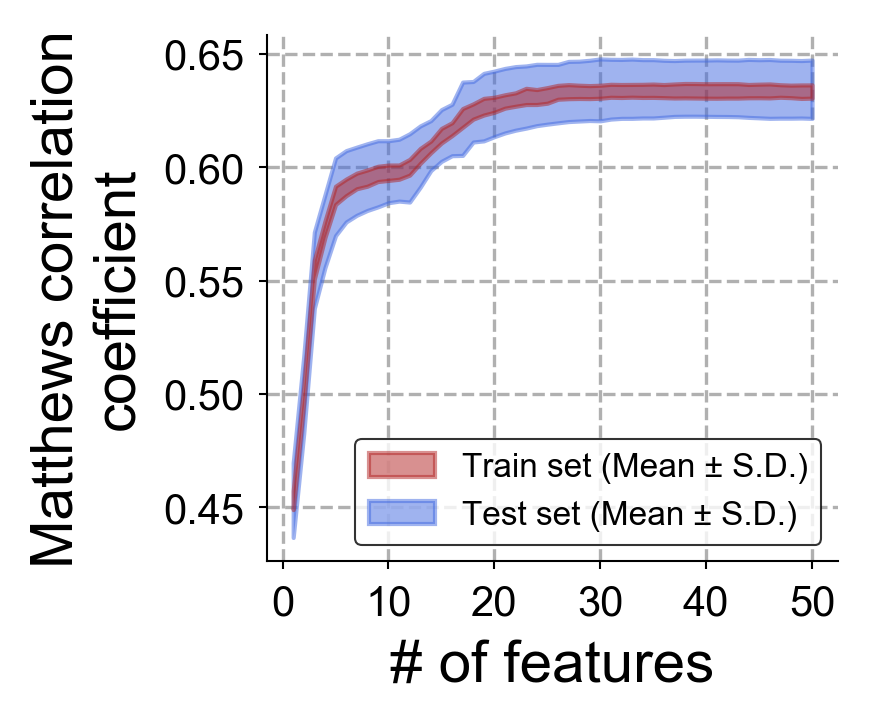

In [43]:
#plot the results
plt.figure(figsize=(3.0,2.5))
plt.rcParams["figure.dpi"] = 300
ax = plt.subplot(111)
plt.rcParams['axes.axisbelow'] = True
plt.rc('axes', axisbelow=True)   
p1 = ax.fill_between(range(1,51), class_test_lower, class_test_upper, color='royalblue', alpha=.5)
p2 = ax.fill_between(range(1,51), class_train_lower, class_train_upper, color='firebrick', alpha=.5)
    
legend = plt.legend([p2, p1], ['Train set (Mean ± S.D.)', 'Test set (Mean ± S.D.)'],loc='lower right', 
                    scatterpoints=1,edgecolor='black',fontsize=8) 
legend = legend.get_frame().set_linewidth(0.5)

plt.xlabel("# of features",fontsize=14)
plt.ylabel("Matthews correlation\ncoefficient",fontsize=14)


plt.xticks([0,10,20,30,40,50],[0,10,20,30,40,50],fontsize=10)
plt.yticks(fontsize=10)

for axis in ['bottom','left']:
    ax.spines[axis].set_linewidth(0.5)
    
#modify the lindth of the ticks
ax = plt.gca()
ax.tick_params(width=0.5)
#the length of the ticks
ax.tick_params(axis='both',length=2)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

ax.grid(ls="--") 
ax.grid(zorder=50)
#save figure
plt.tight_layout()
plt.savefig(savedata_dir  + "classfication_result.png",dpi=300)

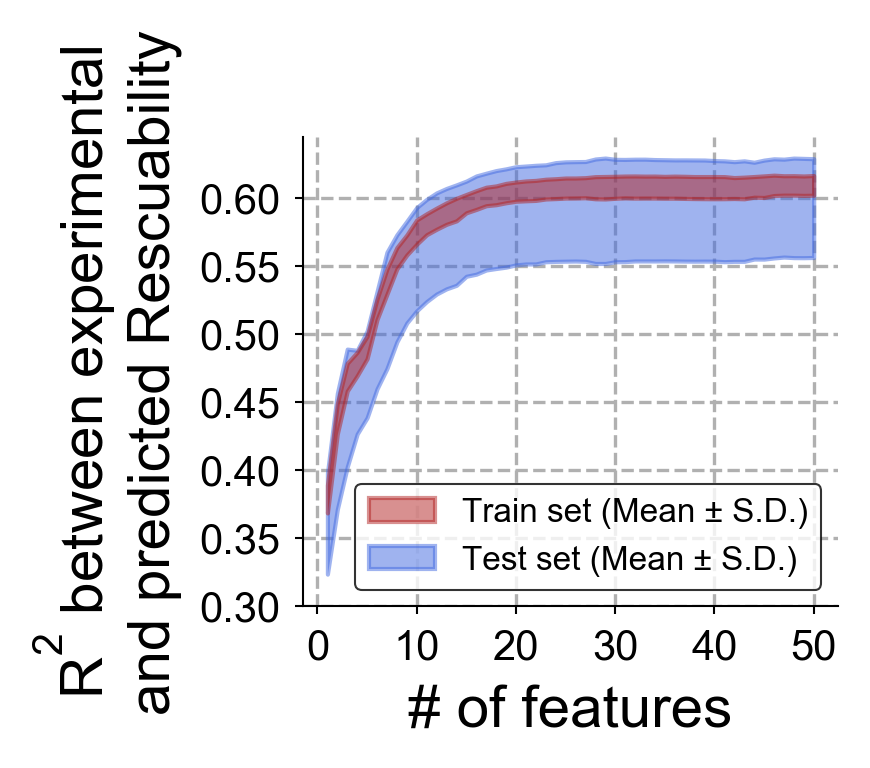

In [46]:
#also for the contious(R2 and correlation)
#plot the results
plt.figure(figsize=(3.0,2.5
                   ))
plt.rcParams["figure.dpi"] = 300
ax = plt.subplot(111)
plt.rcParams['axes.axisbelow'] = True
plt.rc('axes', axisbelow=True)   

p1 = ax.fill_between(range(1,51), contious_test_lower, contious_test_upper, color='royalblue', alpha=.5)
p2 = ax.fill_between(range(1,51), contious_train_lower, contious_train_upper, color='firebrick', alpha=.5)
    

legend = plt.legend([p2, p1], ['Train set (Mean ± S.D.)', 'Test set (Mean ± S.D.)'],loc='lower right', scatterpoints=1,edgecolor='black',fontsize=8) 
legend = legend.get_frame().set_linewidth(0.5)

plt.xlabel("# of features",fontsize=14)
plt.ylabel("$\mathregular{R^2}$ between experimental\nand predicted Rescuability",fontsize=14)


plt.xticks([0,10,20,30,40,50],[0,10,20,30,40,50],fontsize=10)
plt.yticks([0.30,0.35,0.40,0.45,0.50,0.55,0.60],["0.30",0.35,"0.40",0.45,"0.50",0.55,"0.60"],fontsize=10)

for axis in ['bottom','left']:
    ax.spines[axis].set_linewidth(0.5)
    
#modify the lindth of the ticks
ax = plt.gca()
ax.tick_params(width=0.5)
#the length of the ticks
ax.tick_params(axis='both',length=2)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)




ax.grid(ls="--") 
ax.grid(zorder=50)
#save figure
plt.tight_layout()
plt.savefig(savedata_dir  + "contious_result.png",dpi=300)

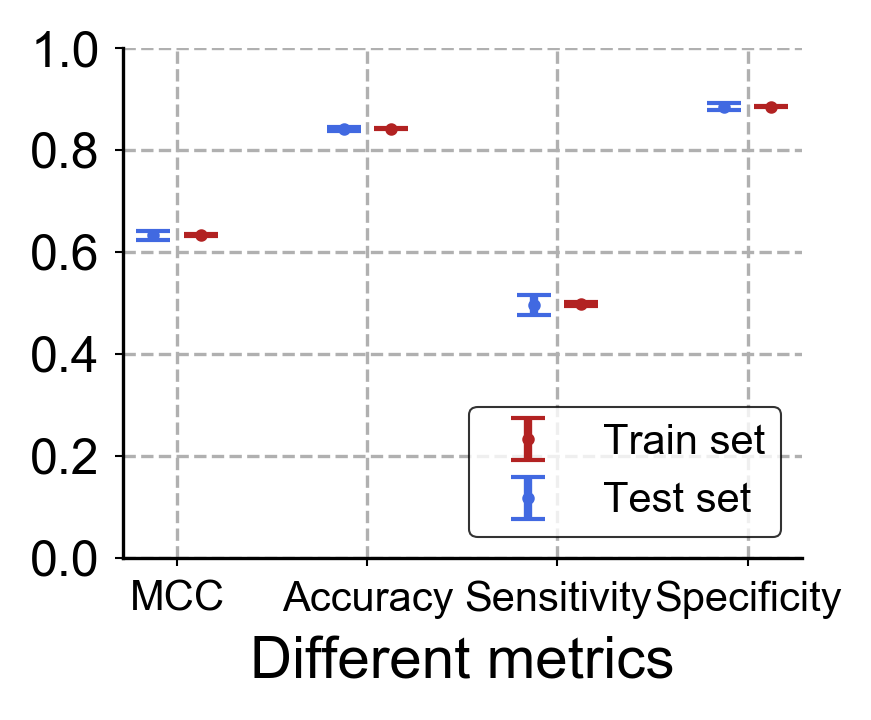

In [53]:
#different metrics show good classfication result
#plot the results
#20 features included of classfication
#calculate the accuracy--sensitivity--specificity
plt.figure(figsize=(3.0,2.5))
test_tn_list = np.array([3837, 3863, 3822, 3869, 3790])
test_fp_list = np.array([500, 474, 514, 467, 546])
test_fn_list = np.array([528, 521, 507, 494, 481])
test_tp_list = np.array([500, 474, 514, 467, 546])
#-------------
train_tn_list = np.array([15339, 15332, 15352, 15327, 15387])
train_fp_list = np.array([2006, 2013, 1994, 2019, 1959])
train_fn_list = np.array([1990, 2013, 2030, 2032, 2035])
train_tp_list = np.array([2006, 2013, 1994, 2019, 1959])
#calcluate the sensivity
test_sen = test_tp_list/(test_tp_list+test_fn_list)
train_sen = train_tp_list/(train_tp_list+train_fn_list)

#calculate the sepcificity
test_sep = test_tn_list/(test_tn_list+test_fp_list)
train_sep = train_tn_list/(train_tn_list+train_fp_list)
#store the acc
test_acc = np.array([0.83788046, 0.84308469, 0.83895899, 0.84842271, 0.83798706])
train_acc = np.array([0.84242902, 0.84124606, 0.84133118, 0.84026655, 0.84252031])
#store the mcc
test_mcc = np.array([0.62361608, 0.63482625, 0.62787583, 0.64816998, 0.62862499])
train_mcc = np.array([0.63572196, 0.63278941, 0.63253801, 0.63035509, 0.63483002])
#plot the results
mean_result_test = [np.mean(test_mcc),np.mean(test_acc),np.mean(test_sen),np.mean(test_sep)]
se_result_test = [np.std(test_mcc),np.std(test_acc),np.std(test_sen),np.std(test_sep)]

mean_result_train = [np.mean(train_mcc),np.mean(train_acc),np.mean(train_sen),np.mean(train_sep)]
se_result_train = [np.std(train_mcc),np.std(train_acc),np.std(train_sen),np.std(train_sep)]
metric_list = ["MCC","Accuracy","Sensitivity","Specificity"]
#plot
for feature_N in range(1,5):
    p1 = plt.errorbar(feature_N,mean_result_test[feature_N-1],yerr=se_result_test[feature_N-1],color="royalblue",fmt='.',
                      elinewidth=2,markersize=4,capsize=4)
    p2 = plt.errorbar(feature_N+0.25,mean_result_train[feature_N-1],yerr=se_result_train[feature_N-1],color="firebrick",fmt='.',
                      elinewidth=2,markersize=4,capsize=4)
    
    
    
    
plt.xlabel("Different metrics",fontsize=14)
plt.xticks(fontsize=5)
plt.yticks(fontsize=5)

for axis in ['bottom','left']:
    ax.spines[axis].set_linewidth(0.5)
    
#modify the lindth of the ticks
ax = plt.gca()
ax.tick_params(width=0.5)
#the length of the ticks
ax.tick_params(axis='both',length=2)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)



legend = plt.legend([p2, p1], ['Train set', 'Test set'], loc='lower right', scatterpoints=1,edgecolor='black',fontsize=10) 

legend = legend.get_frame().set_linewidth(0.5)


plt.ylim([0,1])
plt.xticks([1.125,2.125,3.125,4.125],metric_list,fontsize = 10)
plt.yticks(fontsize = 12)

plt.grid(ls="--")  
plt.tight_layout()
#plt.savefig("C:/Users/DELL/Desktop/project-compen/resullt-pic/prediction_non_yes_rescue/non_linear_svm_diff_metric.pdf", format='pdf', dpi=300)

#save the difure
plt.savefig(savedata_dir  + "class_4metrics+_prediction.png",dpi=300)
plt.show()

In [64]:
#compare the true rescuability and predicted rescuability
#plot the contious features
from sklearn.model_selection import cross_val_predict
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import KFold

contious_prepare_data = pd.read_csv(readdata_dir + "MLFile/MLPrepare_data.tsv",sep = "\t")

cv_split = KFold(n_splits=5, shuffle= True,random_state=0)
knn_non_linear =  KNeighborsRegressor(n_neighbors=50)
top50_data = pd.read_csv(readdata_dir + "MLFile/top50_features.txt",sep = "\t")
contious_prepare_data_keep = contious_prepare_data[contious_prepare_data["if_res"]==1]
rescuability_contious = contious_prepare_data_keep["rescuability"].values
top50_feature = top50_data["contious_prediction"].values
ml_pick_data = contious_prepare_data_keep.loc[:,top50_feature].values
predicted_rescuability = cross_val_predict(knn_non_linear,ml_pick_data,rescuability_contious , cv=cv_split)


In [66]:
import matplotlib as mpl
def reverse_colourmap(cmap, name = 'my_cmap_r'):
    """
    In: 
    cmap, name 
    Out:
    my_cmap_r

    Explanation:
    t[0] goes from 0 to 1
    row i:   x  y0  y1 -> t[0] t[1] t[2]
                   /
                  /
    row i+1: x  y0  y1 -> t[n] t[1] t[2]

    so the inverse should do the same:
    row i+1: x  y1  y0 -> 1-t[0] t[2] t[1]
                   /
                  /
    row i:   x  y1  y0 -> 1-t[n] t[2] t[1]
    """        
    reverse = []
    k = []   

    for key in cmap._segmentdata:    
        k.append(key)
        channel = cmap._segmentdata[key]
        data = []

        for t in channel:                    
            data.append((1-t[0],t[2],t[1]))            
        reverse.append(sorted(data))    

    LinearL = dict(zip(k,reverse))
    my_cmap_r = mpl.colors.LinearSegmentedColormap(name, LinearL) 
    return my_cmap_r

In [71]:
#save the data 
prediction_meaturementData = pd.DataFrame({"measured_rescuability":rescuability_contious,
                                          "predicted_rescuabilitytop50feature":predicted_rescuability})
prediction_meaturementData.to_csv(readdata_dir+"MLFile/top50predictionrescuabilityContious.txt",sep = "\t",index=False)

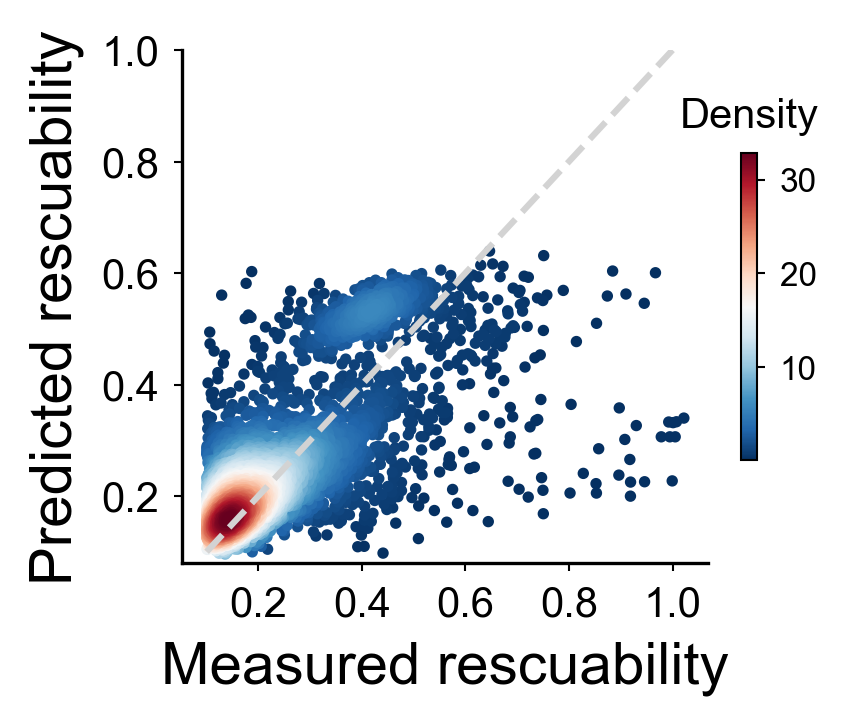

In [93]:
#plot the results of a73 and c73
#set the colorbar
my_cmap = reverse_colourmap(mpl.cm.RdBu)
from scipy.stats import gaussian_kde
plt.figure(figsize=(3,2.5))
x = np.array(rescuability_contious)
y = np.array(predicted_rescuability)
xy = np.vstack([x,y])
z = gaussian_kde(xy)(xy)

# Sort the points by density, so that the densest points are plotted last
idx = z.argsort()
x, y, z = x[idx], y[idx], z[idx]
plt.scatter(x, y, c=z,s=3,cmap=
            my_cmap)
plt.xlabel("Measured rescuability",fontsize=14)
plt.ylabel("Predicted rescuability",fontsize=14)
plt.ylim(0.08,1.0)
plt.plot([0.1,1.0],[0.1,1.0],ls = "--",color="lightgrey")
#add the colorbar
cbar =plt.colorbar(shrink=0.6)
cbar.ax.set_title('Density', fontsize=10)
cax = plt.gcf().axes[-1]
cax.tick_params(labelsize=8,length=2,width=0.5)
cbar.outline.set_linewidth(0.5)

for axis in ['bottom','left']:
    ax.spines[axis].set_linewidth(0.5)

plt.xticks([0.2,0.4,0.6,0.8,1.0],[0.2,0.4,0.6,0.8,1.0],fontsize = 10)
plt.yticks([0.2,0.4,0.6,0.8,1.0],[0.2,0.4,0.6,0.8,1.0],fontsize = 10)

ax = plt.gca()
ax.tick_params(width=0.5)
#the length of the ticks
ax.tick_params(axis='both',length=2)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

#plt.ylim([0,1])
plt.tight_layout()
plt.savefig(savedata_dir + "r2_true_predicted_scatter.png",dpi = 300)







In [73]:
np.min(rescuability_contious)

0.10004127601962108